# Sağlık sorunları ile şikeyet edip gelen kişilerin ve onların sorunlarına bağlı diğer etmenler neler incelenmesi ve diğer bağlı etmenleri iceleme.

## Çalışma akışı.

- Veriye ilk temas;


- Veri görselleştirmesi;
  1. Uygulanan ilaç tedavisi.
  2. Uygulanan ilaç tedavisi ve bunun cinsiyet üzerine kırılımı.
  3. uygulanan ilaç tedaviyi ve bunun kan grubu acısından bakalım.
  4. Uygulanan ilaç tedavi ve bunun sigorta firması acısından bakalım.
  5. Uygulanan ila. tedavisi ve kişilerin hastalıkları.
  6. Uygulanan ilaç tedavisi ve bunun test sonuçları açısından bakalım.
  7. UYgulanan tedavinin ve bu hastaların hastaneye giriş türü.


- Model kurulmnası;
  1. Model kurulması.
  2. Modele veri setinden rastgele veri seçtirip tahmin yaprırması.


- Etkileşimli şekilde kullanıcıdan alınan verilerden modelin tahmin yapması;

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\realb\Desktop\sağlık alanındaki çalışma\data\healthcare_dataset.csv")

## Veriye ilk temas

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000


In [11]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

## Veri görselleştirmesi yapılması.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Uygulanan ilaç tedavisi

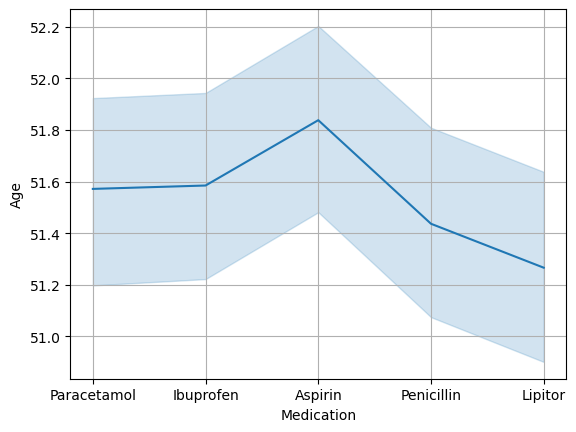

In [18]:
sns.lineplot(x = "Medication", y = "Age", data = df);
plt.grid(True);  

### 2. Uygulanan ilaç tedavisi ve bunun cinsiyet üzerine kırılımı.

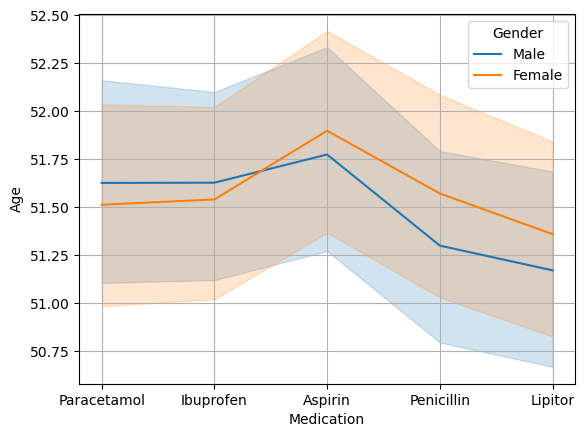

In [20]:
sns.lineplot(x = "Medication", y = "Age", hue = "Gender", data = df);
plt.grid(True); 

### 3. uygulanan ilaç tedaviyi ve bunun kan grubu acısından bakalım.

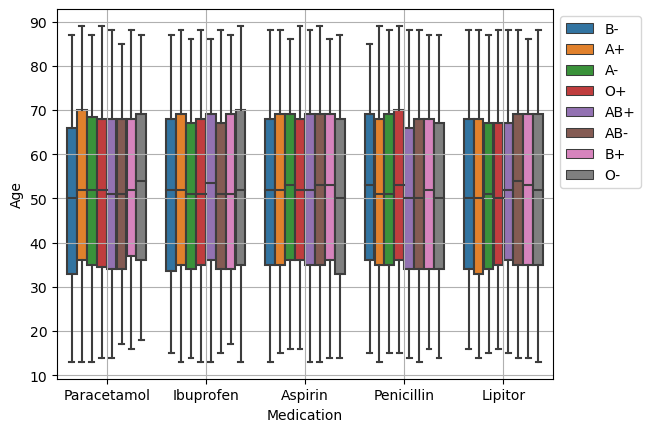

In [23]:
sns.boxplot(x = "Medication", y = "Age", hue = "Blood Type", data = df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True); 

### 4. Uygulanan ilaç tedavi ve bunun sigorta firması acısından bakalım.

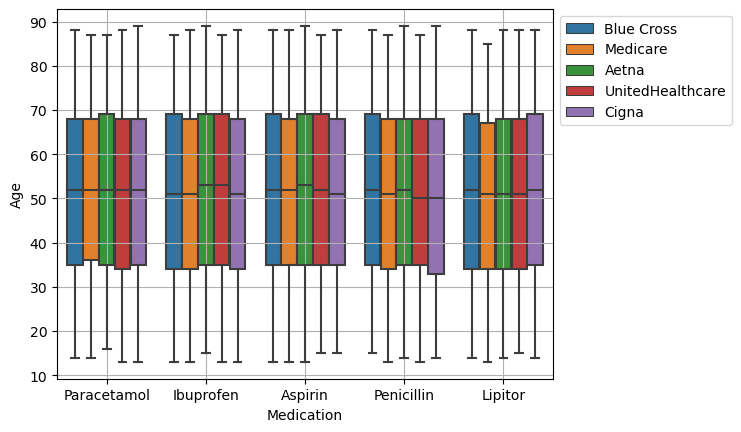

In [24]:
sns.boxplot(x = "Medication", y = "Age", hue = "Insurance Provider", data = df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True); 

### 5. Uygulanan ila. tedavisi ve kişilerin hastalıkları.

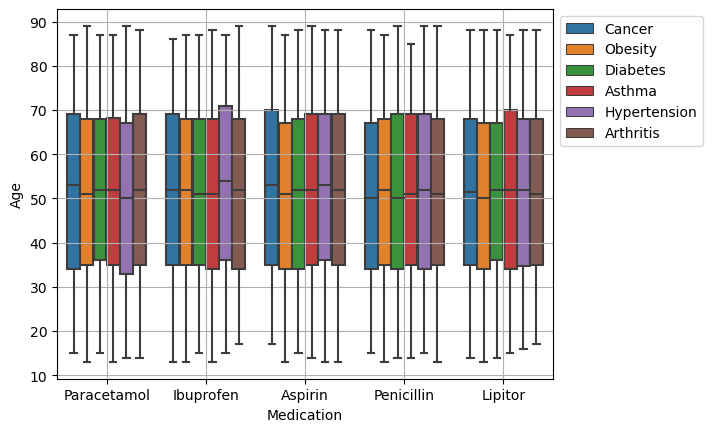

In [26]:
sns.boxplot(x = "Medication", y = "Age", hue = "Medical Condition", data = df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True);

### 6. Uygulanan ilaç tedavisi ve bunun test sonuçları açısından bakalım.

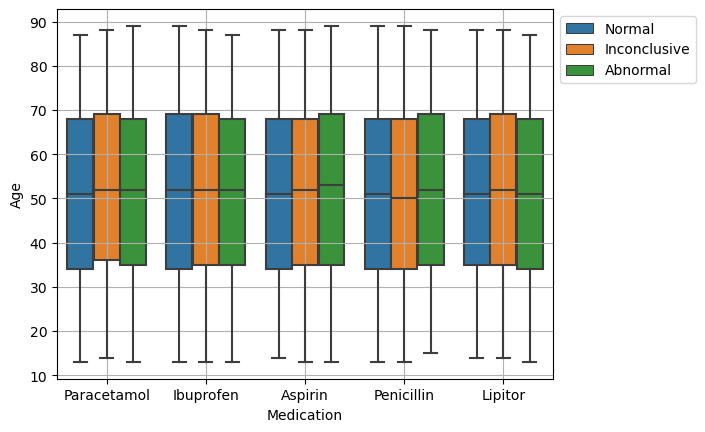

In [28]:
sns.boxplot(x = "Medication", y = "Age", hue = "Test Results", data = df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True);

### 7. UYgulanan tedavinin ve bu hastaların hastaneye giriş türü.

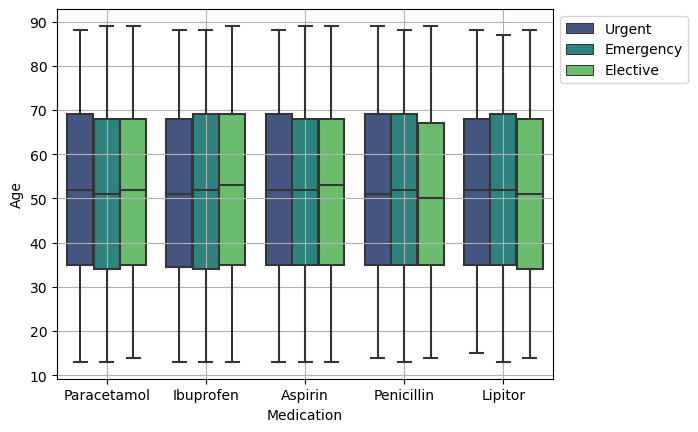

In [32]:
sns.boxplot(x = "Medication", y = "Age", hue = "Admission Type", palette = "viridis", data = df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True);

## Model kurulmnası

### 1. Model kurulması

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [44]:
# Gereksiz kolonları kaldır
df_model = df.drop(columns=['Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date'])

# Kategorik değişkenleri sayısal değerlere çevir
label_encoders = {}
for column in df_model.select_dtypes(include=['object']).columns:
    if column != 'Test Results':
        le = LabelEncoder()
        df_model[column] = le.fit_transform(df_model[column])
        label_encoders[column] = le

# Hedef değişkeni sayısal değerlere çevir
le_test_results = LabelEncoder()
df_model['Test Results'] = le_test_results.fit_transform(df_model['Test Results'])

# Bağımsız ve bağımlı değişkenleri ayır
X = df_model.drop(columns=['Test Results'])
y = to_categorical(df_model['Test Results'])

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri normalleştir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay sinir ağı modelini kur
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Yüzde 50 dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derle ve eğit
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=2, 
                    callbacks=[early_stopping])

# Test seti üzerinde modeli değerlendir
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Sonuçları yazdır
print(f'Test Kayıp (Loss): {test_loss:.4f}')
print(f'Test Doğruluk (Accuracy): {test_accuracy:.4f}')

Epoch 1/200
1388/1388 - 2s - loss: 1.1065 - accuracy: 0.3300 - val_loss: 1.0988 - val_accuracy: 0.3345 - 2s/epoch - 2ms/step
Epoch 2/200
1388/1388 - 2s - loss: 1.0995 - accuracy: 0.3350 - val_loss: 1.0989 - val_accuracy: 0.3388 - 2s/epoch - 1ms/step
Epoch 3/200
1388/1388 - 2s - loss: 1.0994 - accuracy: 0.3362 - val_loss: 1.0985 - val_accuracy: 0.3371 - 2s/epoch - 1ms/step
Epoch 4/200
1388/1388 - 2s - loss: 1.0993 - accuracy: 0.3329 - val_loss: 1.0985 - val_accuracy: 0.3323 - 2s/epoch - 1ms/step
Epoch 5/200
1388/1388 - 2s - loss: 1.0991 - accuracy: 0.3361 - val_loss: 1.0987 - val_accuracy: 0.3334 - 2s/epoch - 1ms/step
Epoch 6/200
1388/1388 - 2s - loss: 1.0992 - accuracy: 0.3347 - val_loss: 1.0987 - val_accuracy: 0.3324 - 2s/epoch - 1ms/step
Epoch 7/200
1388/1388 - 2s - loss: 1.0989 - accuracy: 0.3388 - val_loss: 1.0985 - val_accuracy: 0.3293 - 2s/epoch - 1ms/step
Epoch 8/200
1388/1388 - 2s - loss: 1.0990 - accuracy: 0.3371 - val_loss: 1.0989 - val_accuracy: 0.3300 - 2s/epoch - 1ms/step


In [52]:
# Modeli kaydet
model.save('model.h5')

C:\Users\realb\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


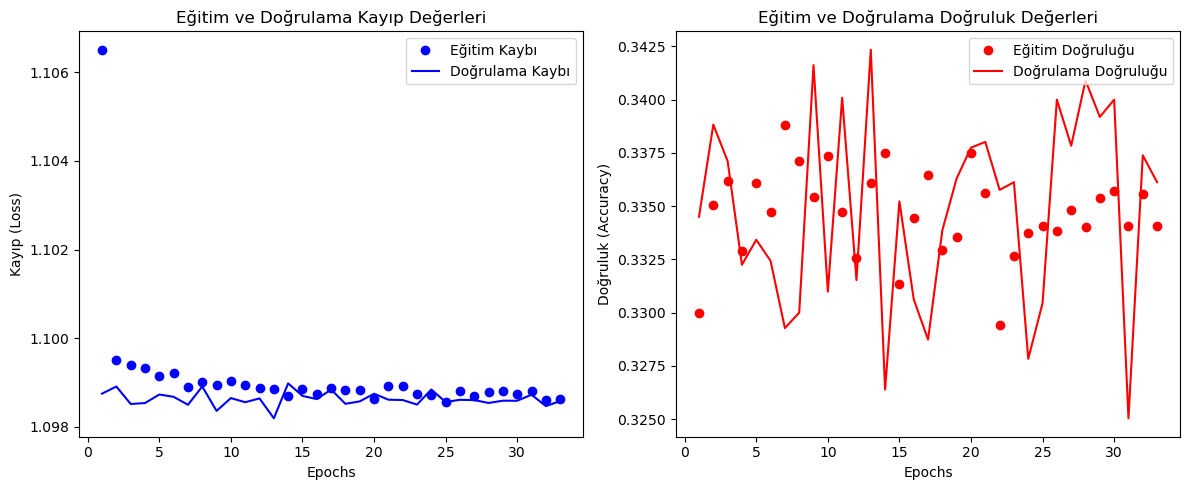

In [47]:
# Eğitim ve doğrulama verileri üzerinden kayıp ve doğruluk değerleri
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Kayıp grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss_values, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kayıp Değerleri')
plt.xlabel('Epochs')
plt.ylabel('Kayıp (Loss)')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'ro', label='Eğitim Doğruluğu')
plt.plot(epochs, val_accuracy_values, 'r', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluk Değerleri')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()

plt.tight_layout()
plt.show()

### 2. Modele veri setinden rastgele veri seçtirip tahmin yaprırması.

In [46]:
import numpy as np

# Test setinden rastgele bir veri seç
random_index = np.random.randint(0, X_test.shape[0])
random_sample = X_test[random_index].reshape(1, -1)
actual_result = y_test[random_index]

# Modele tahmin yaptır
predicted_result = model.predict(random_sample)

# Tahmini ve gerçek sonucu yazdır
predicted_class = np.argmax(predicted_result, axis=1)
actual_class = np.argmax(actual_result, axis=0)

print(f"Rastgele seçilen veri için gerçek sonuç: {le_test_results.inverse_transform([actual_class])[0]}")
print(f"Modelin tahmini: {le_test_results.inverse_transform([predicted_class[0]])[0]}")

1/1 [==============================] - 0s 13ms/step
Rastgele seçilen veri için gerçek sonuç: Inconclusive
Modelin tahmini: Inconclusive


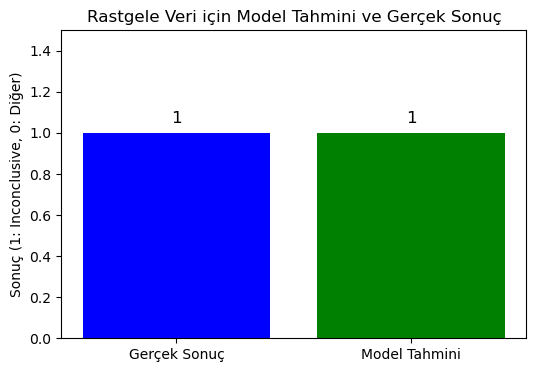

In [48]:
# Gerçek sonuç ve model tahmini
gercek_sonuc = 'Inconclusive'  # Gerçek sonuç
model_tahmini = 'Inconclusive'  # Modelin tahmini

# Sınıfların etiketleri ve ilgili değerler
etiketler = ['Gerçek Sonuç', 'Model Tahmini']
degerler = [1 if gercek_sonuc == 'Inconclusive' else 0, 
            1 if model_tahmini == 'Inconclusive' else 0]

# Grafik oluşturma
plt.figure(figsize=(6, 4))
plt.bar(etiketler, degerler, color=['blue', 'green'])
plt.ylim(0, 1.5)  # Çubukların maksimum yüksekliği
plt.ylabel('Sonuç (1: Inconclusive, 0: Diğer)')
plt.title('Rastgele Veri için Model Tahmini ve Gerçek Sonuç')

# Grafik üzerinde değerlerin gösterilmesi
for i in range(len(degerler)):
    plt.text(i, degerler[i] + 0.05, str(degerler[i]), ha='center', fontsize=12)

plt.show()

## Etkileşimli şekilde kullanıcıdan alınan verilerden modelin tahmin yapması.

In [65]:
import tkinter as tk
from tkinter import messagebox
from tensorflow.keras.models import load_model
import joblib

In [68]:
# Model dosyasının yolunu belirtin
model_path = r'C:\Users\realb\Desktop\sağlık alanındaki çalışma\calisma\model.h5'

try:
    model = load_model(model_path)
    print("Model başarıyla yüklendi.")
except Exception as e:
    print("Model yükleme hatası:", e)


# LabelEncoder nesnelerini yükle
label_encoders = {
    'Age': LabelEncoder(),  # LabelEncoders'ı uygun şekilde yükleyin
    'Gender': LabelEncoder(),
    'Blood Type': LabelEncoder(),
    'Medical Condition': LabelEncoder(),
    'Admission Type': LabelEncoder(),
    'Medication': LabelEncoder()
}

# Bu fonksiyon, kullanıcıdan alınan verileri işleyecek
def tahmin_yap():
    veri1 = entry_age.get()
    veri2 = entry_gender.get()
    veri3 = entry_blood_type.get()
    veri4 = entry_medical_condition.get()
    veri5 = entry_admission_type.get()
    veri6 = entry_medication.get()

    if veri1 and veri2 and veri3 and veri4 and veri5 and veri6:
        # Veriyi sayısal forma çevir
        veriler = np.array([[int(veri1), 
                             label_encoders['Gender'].transform([veri2])[0], 
                             label_encoders['Blood Type'].transform([veri3])[0], 
                             label_encoders['Medical Condition'].transform([veri4])[0], 
                             label_encoders['Admission Type'].transform([veri5])[0], 
                             label_encoders['Medication'].transform([veri6])[0]]])
        
        # Tahmin yap
        tahmin = model.predict(veriler)
        tahmin_sonuc = np.argmax(tahmin)
        tahmin_etiket = le_test_results.classes_[tahmin_sonuc]

        # Tahmini kullanıcıya göster
        messagebox.showinfo("Tahmin Sonucu", f"Model Tahmini: {tahmin_etiket}")
    else:
        messagebox.showwarning("Uyarı", "Lütfen tüm alanları doldurun!")

# Tkinter arayüzü
root = tk.Tk()
root.title("Model Tahmini Arayüzü")

# Pencere boyutunu ayarlayın
root.geometry("250x500")

# Veri girişi için etiketler ve giriş kutuları
label_age = tk.Label(root, text="Yaş:")
label_age.pack()
entry_age = tk.Entry(root)
entry_age.pack()

label_gender = tk.Label(root, text="Cinsiyet:")
label_gender.pack()
entry_gender = tk.Entry(root)
entry_gender.pack()

label_blood_type = tk.Label(root, text="Kan Grubu: (A,A-,A+,B,B-,B+,..)")
label_blood_type.pack()
entry_blood_type = tk.Entry(root)
entry_blood_type.pack()

label_medical_condition = tk.Label(root, text="Medikal Durum: (Cancer, Obesity, Asthma, Hypertension,...)")
label_medical_condition.pack()
entry_medical_condition = tk.Entry(root)
entry_medical_condition.pack()

label_admission_type = tk.Label(root, text="Kabul Tipi: (Urgent, Emergency, Elective,)")
label_admission_type.pack()
entry_admission_type = tk.Entry(root)
entry_admission_type.pack()

label_medication = tk.Label(root, text="İlaç: (Paracetamol, Ibuprofen, Penicillin, Lipitor)")
label_medication.pack()
entry_medication = tk.Entry(root)
entry_medication.pack()

# Tahmin yap butonu
button_tahmin = tk.Button(root, text="Tahmin Yap", command=tahmin_yap)
button_tahmin.pack()

# Tkinter ana döngüsü
root.mainloop()

Model yükleme hatası: 'utf-8' codec can't decode byte 0xe7 in position 45: invalid continuation byte
